In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
warnings.simplefilter(action='ignore', category=FutureWarning)

# A comprehensive guide to downloading stock prices in Python

For the accompanying article, please take a look [here]().

## Setup

In [37]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials

## Downloading the stock prices using `yfinance`

Download Tesla's stock prices between from 2019:

In [4]:
tsla_df = yf.download('TSLA', start='2019-01-01', 
                      end='2019-12-31', progress=False)
tsla_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,337.790009,339.209991,325.260010,332.799988,332.799988,6302300
2019-01-02,306.100006,315.130005,298.799988,310.119995,310.119995,11658600
2019-01-03,307.000000,309.399994,297.380005,300.359985,300.359985,6965200
2019-01-04,306.000000,318.000000,302.730011,317.690002,317.690002,7394100
2019-01-07,321.720001,336.739990,317.750000,334.959991,334.959991,7551200


Use the `Ticker` module to download Tesla's stock prices (all-time):

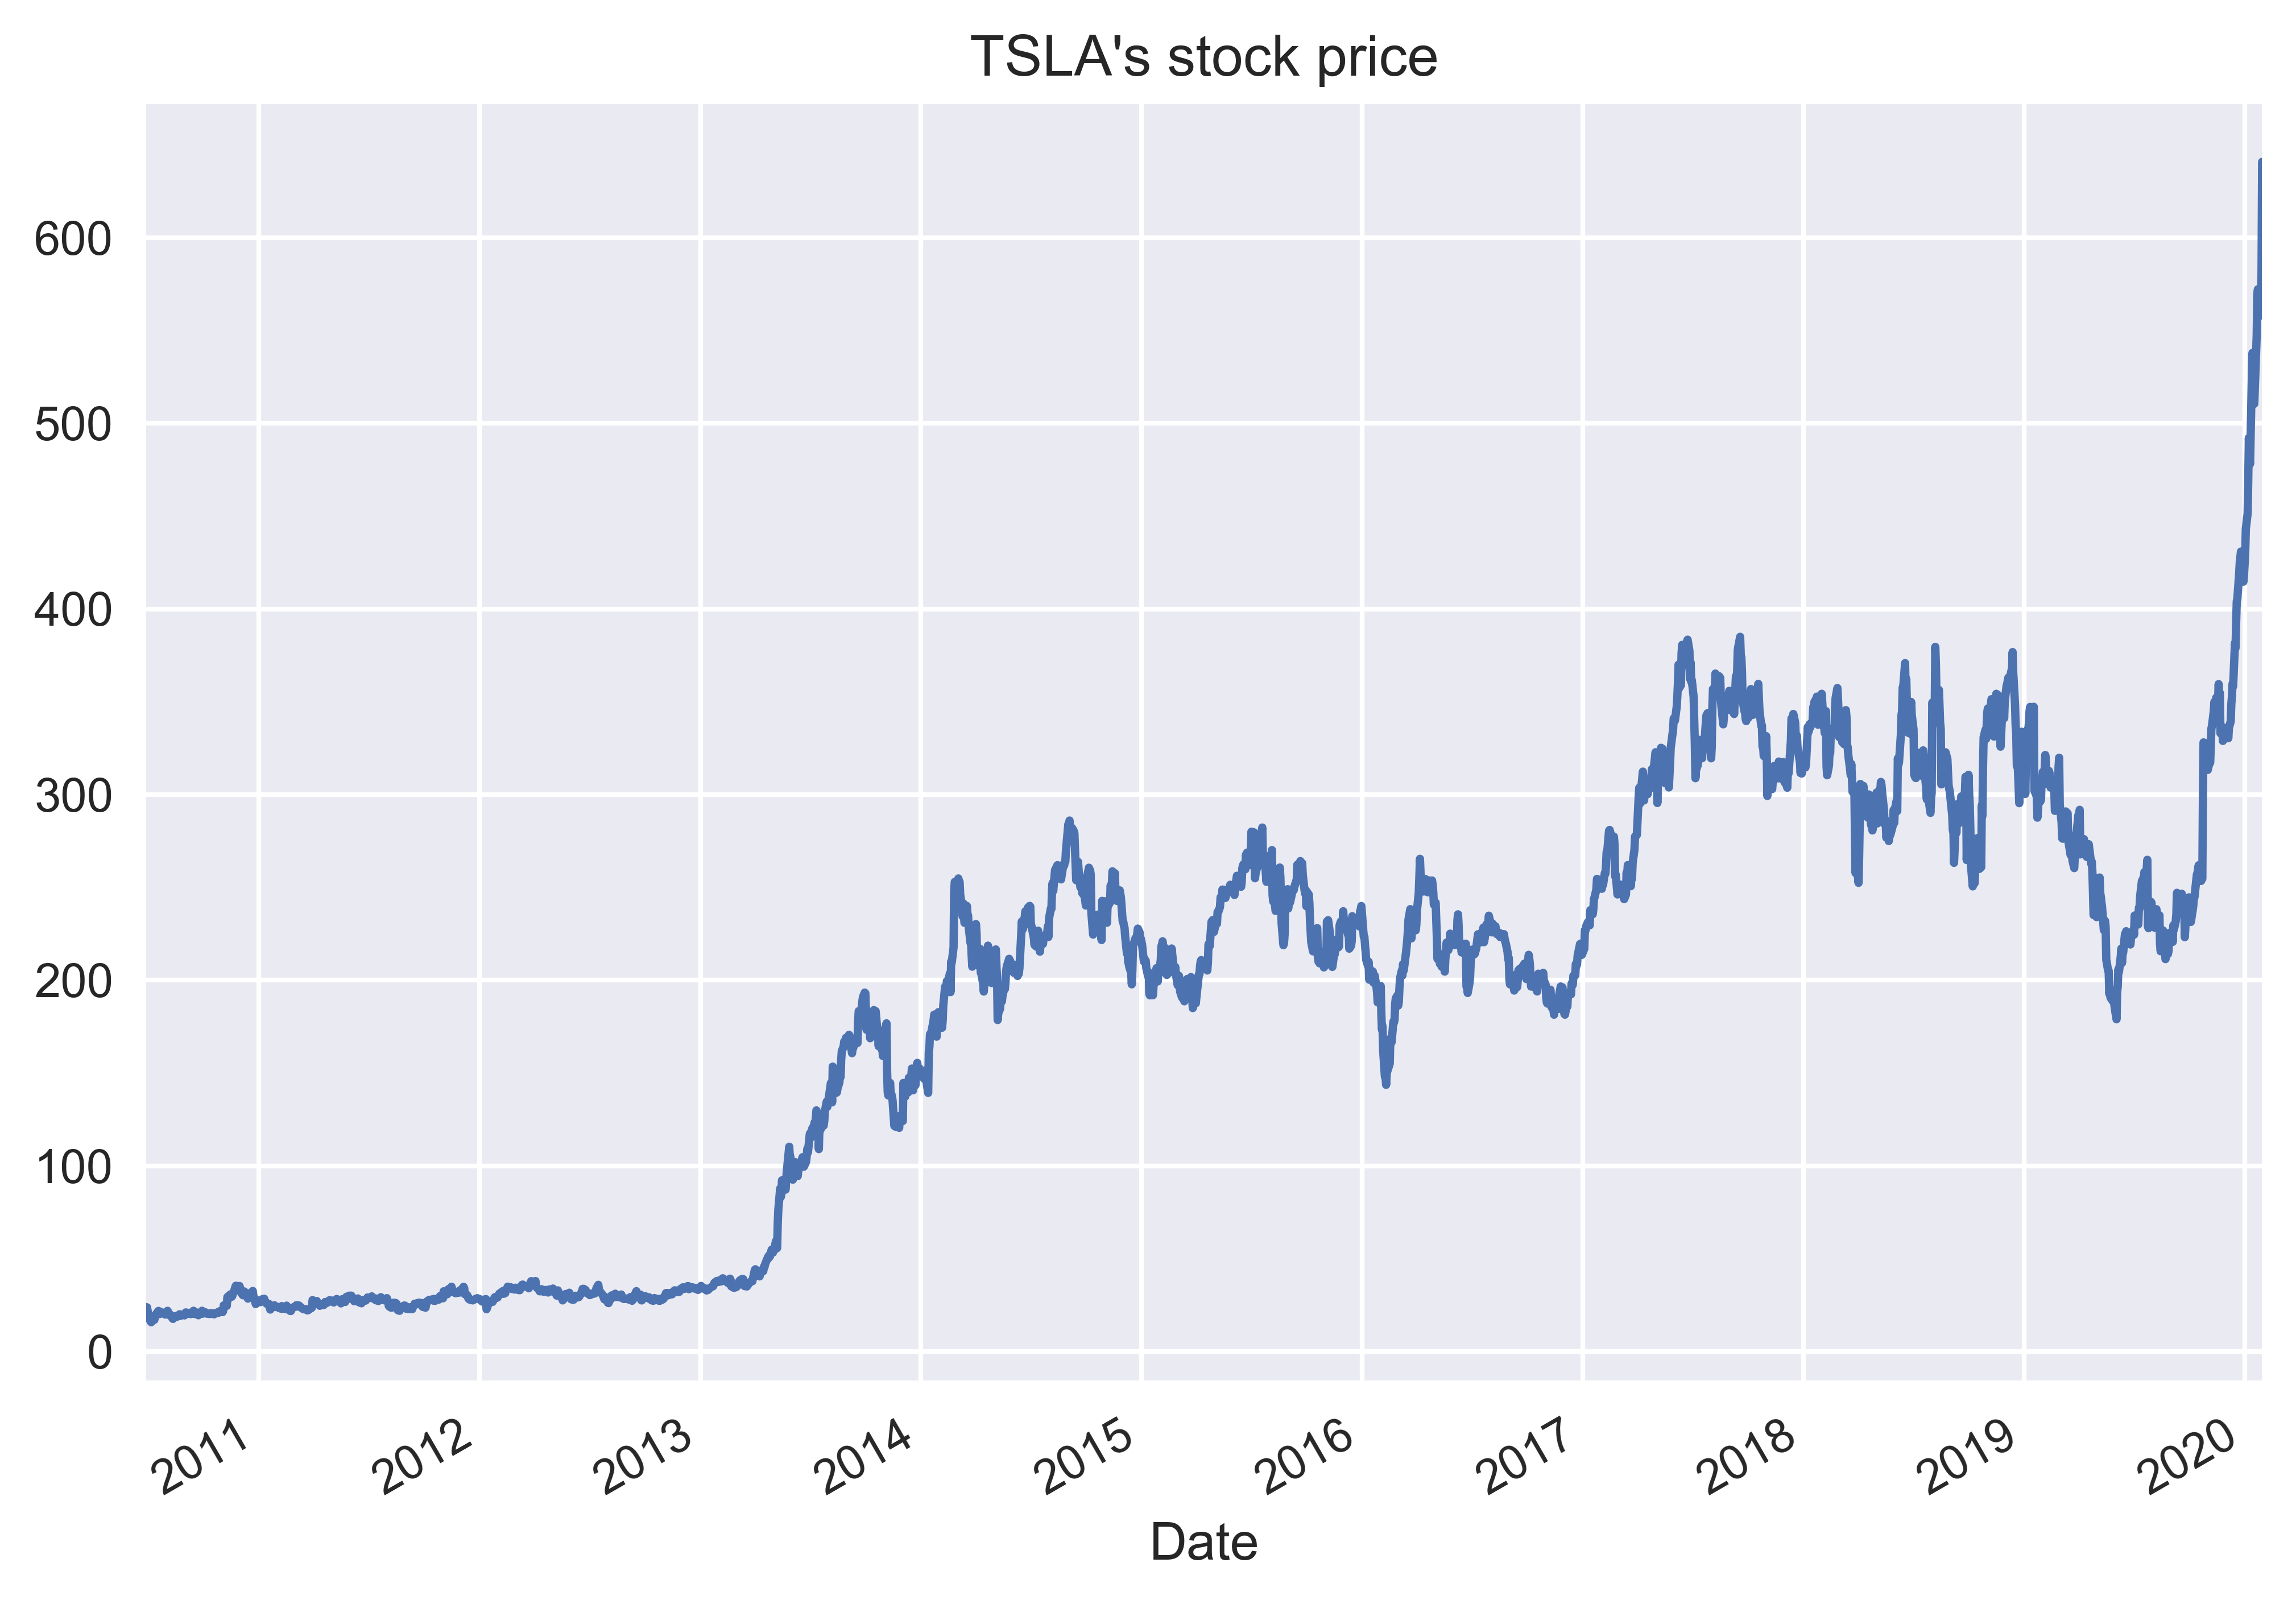

In [28]:
ticker = yf.Ticker('TSLA')

tsla_df = ticker.history(period="max")

tsla_df['Close'].plot(title="TSLA's stock price");

## Downloading the stock prices using `yahoofinancials`

In [62]:
yahoo_financials = YahooFinancials('TSLA')

data = yahoo_financials.get_historical_price_data(start_date='2000-01-01', 
                                                  end_date='2019-12-31', 
                                                  time_interval='weekly')

tsla_df = pd.DataFrame(data['TSLA']['prices'])
tsla_df = tsla_df.drop('date', axis=1).set_index('formatted_date')
tsla_df.head()

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2010-06-28,30.42,17.540001,19.000000,19.200001,49312000,19.200001
2010-07-05,20.00,14.980000,20.000000,17.400000,25550600,17.400000
2010-07-12,21.50,16.900000,17.950001,20.639999,15438900,20.639999
2010-07-19,22.25,19.500000,21.370001,21.290001,7175700,21.290001
2010-07-26,21.50,19.549999,21.500000,19.940001,3052000,19.940001


In [63]:
yahoo_financials.get_stock_quote_type_data()

{'TSLA': {'exchange': 'NMS',
  'shortName': 'Tesla, Inc.',
  'longName': 'Tesla, Inc.',
  'exchangeTimezoneName': 'America/New_York',
  'exchangeTimezoneShortName': 'EST',
  'isEsgPopulated': False,
  'gmtOffSetMilliseconds': '-18000000',
  'quoteType': 'EQUITY',
  'symbol': 'TSLA',
  'messageBoardId': 'finmb_27444752',
  'market': 'us_market'}}

In [64]:
yahoo_financials.get_key_statistics_data()

{'TSLA': {'annualHoldingsTurnover': None,
  'enterpriseToRevenue': 4.728,
  'beta3Year': None,
  'profitMargins': -0.03387,
  'enterpriseToEbitda': 52.99,
  '52WeekChange': 0.89235234,
  'morningStarRiskRating': None,
  'forwardEps': 12.83,
  'revenueQuarterlyGrowth': None,
  'sharesOutstanding': 180244992,
  'fundInceptionDate': '-',
  'annualReportExpenseRatio': None,
  'totalAssets': None,
  'bookValue': 33.556,
  'sharesShort': 24954265,
  'sharesPercentSharesOut': 0.1384,
  'fundFamily': None,
  'lastFiscalYearEnd': 1546214400,
  'heldPercentInstitutions': 0.58289003,
  'netIncomeToCommon': -835091008,
  'trailingEps': -4.772,
  'lastDividendValue': None,
  'SandP52WeekChange': 0.21053207,
  'priceToBook': 19.096733,
  'heldPercentInsiders': 0.20957,
  'nextFiscalYearEnd': 1609372800,
  'yield': None,
  'mostRecentQuarter': 1569801600,
  'shortRatio': 2.66,
  'sharesShortPreviousMonthDate': '2019-12-13',
  'floatShares': 142142897,
  'beta': 0.650468,
  'enterpriseValue': 11546045

In [65]:
yahoo_financials.get_summary_data()

{'TSLA': {'previousClose': 580.99,
  'regularMarketOpen': 632.42,
  'twoHundredDayAverage': 315.66226,
  'trailingAnnualDividendYield': None,
  'payoutRatio': 0,
  'volume24Hr': None,
  'regularMarketDayHigh': 650.88,
  'navPrice': None,
  'averageDailyVolume10Day': 18053600,
  'totalAssets': None,
  'regularMarketPreviousClose': 580.99,
  'fiftyDayAverage': 466.16122,
  'trailingAnnualDividendRate': None,
  'open': 632.42,
  'averageVolume10days': 18053600,
  'expireDate': '-',
  'yield': None,
  'algorithm': None,
  'dividendRate': None,
  'exDividendDate': '-',
  'beta': 0.650468,
  'circulatingSupply': None,
  'startDate': '-',
  'regularMarketDayLow': 618.15,
  'priceHint': 2,
  'currency': 'USD',
  'regularMarketVolume': 28191975,
  'lastMarket': None,
  'maxSupply': None,
  'openInterest': None,
  'marketCap': 115502792704,
  'volumeAllCurrencies': None,
  'strikePrice': None,
  'averageVolume': 11968598,
  'priceToSalesTrailing12Months': 4.729792,
  'dayLow': 618.15,
  'ask': 6

In [75]:
yahoo_financials.get_stock_earnings_data()

{'TSLA': {'earningsData': {'quarterly': [{'date': '1Q2019',
     'actual': -2.9,
     'estimate': -0.69},
    {'date': '2Q2019', 'actual': -1.12, 'estimate': -0.36},
    {'date': '3Q2019', 'actual': 1.86, 'estimate': -0.42},
    {'date': '4Q2019', 'actual': 2.06, 'estimate': 1.72}],
   'currentQuarterEstimate': 0.77,
   'currentQuarterEstimateDate': '1Q',
   'currentQuarterEstimateYear': 2020,
   'earningsDate': [{'raw': 1587513600, 'fmt': '2020-04-22'},
    {'raw': 1587945600, 'fmt': '2020-04-27'}]},
  'financialsData': {'yearly': [{'date': 2015,
     'revenue': 4046025000,
     'earnings': -888663000},
    {'date': 2016, 'revenue': 7000132000, 'earnings': -674914000},
    {'date': 2017, 'revenue': 11758751000, 'earnings': -1961400000},
    {'date': 2018, 'revenue': 21461268000, 'earnings': -976091000}],
   'quarterly': [{'date': '4Q2018',
     'revenue': 7225873000,
     'earnings': 139483000},
    {'date': '1Q2019', 'revenue': 4541464000, 'earnings': -702135000},
    {'date': '2Q201

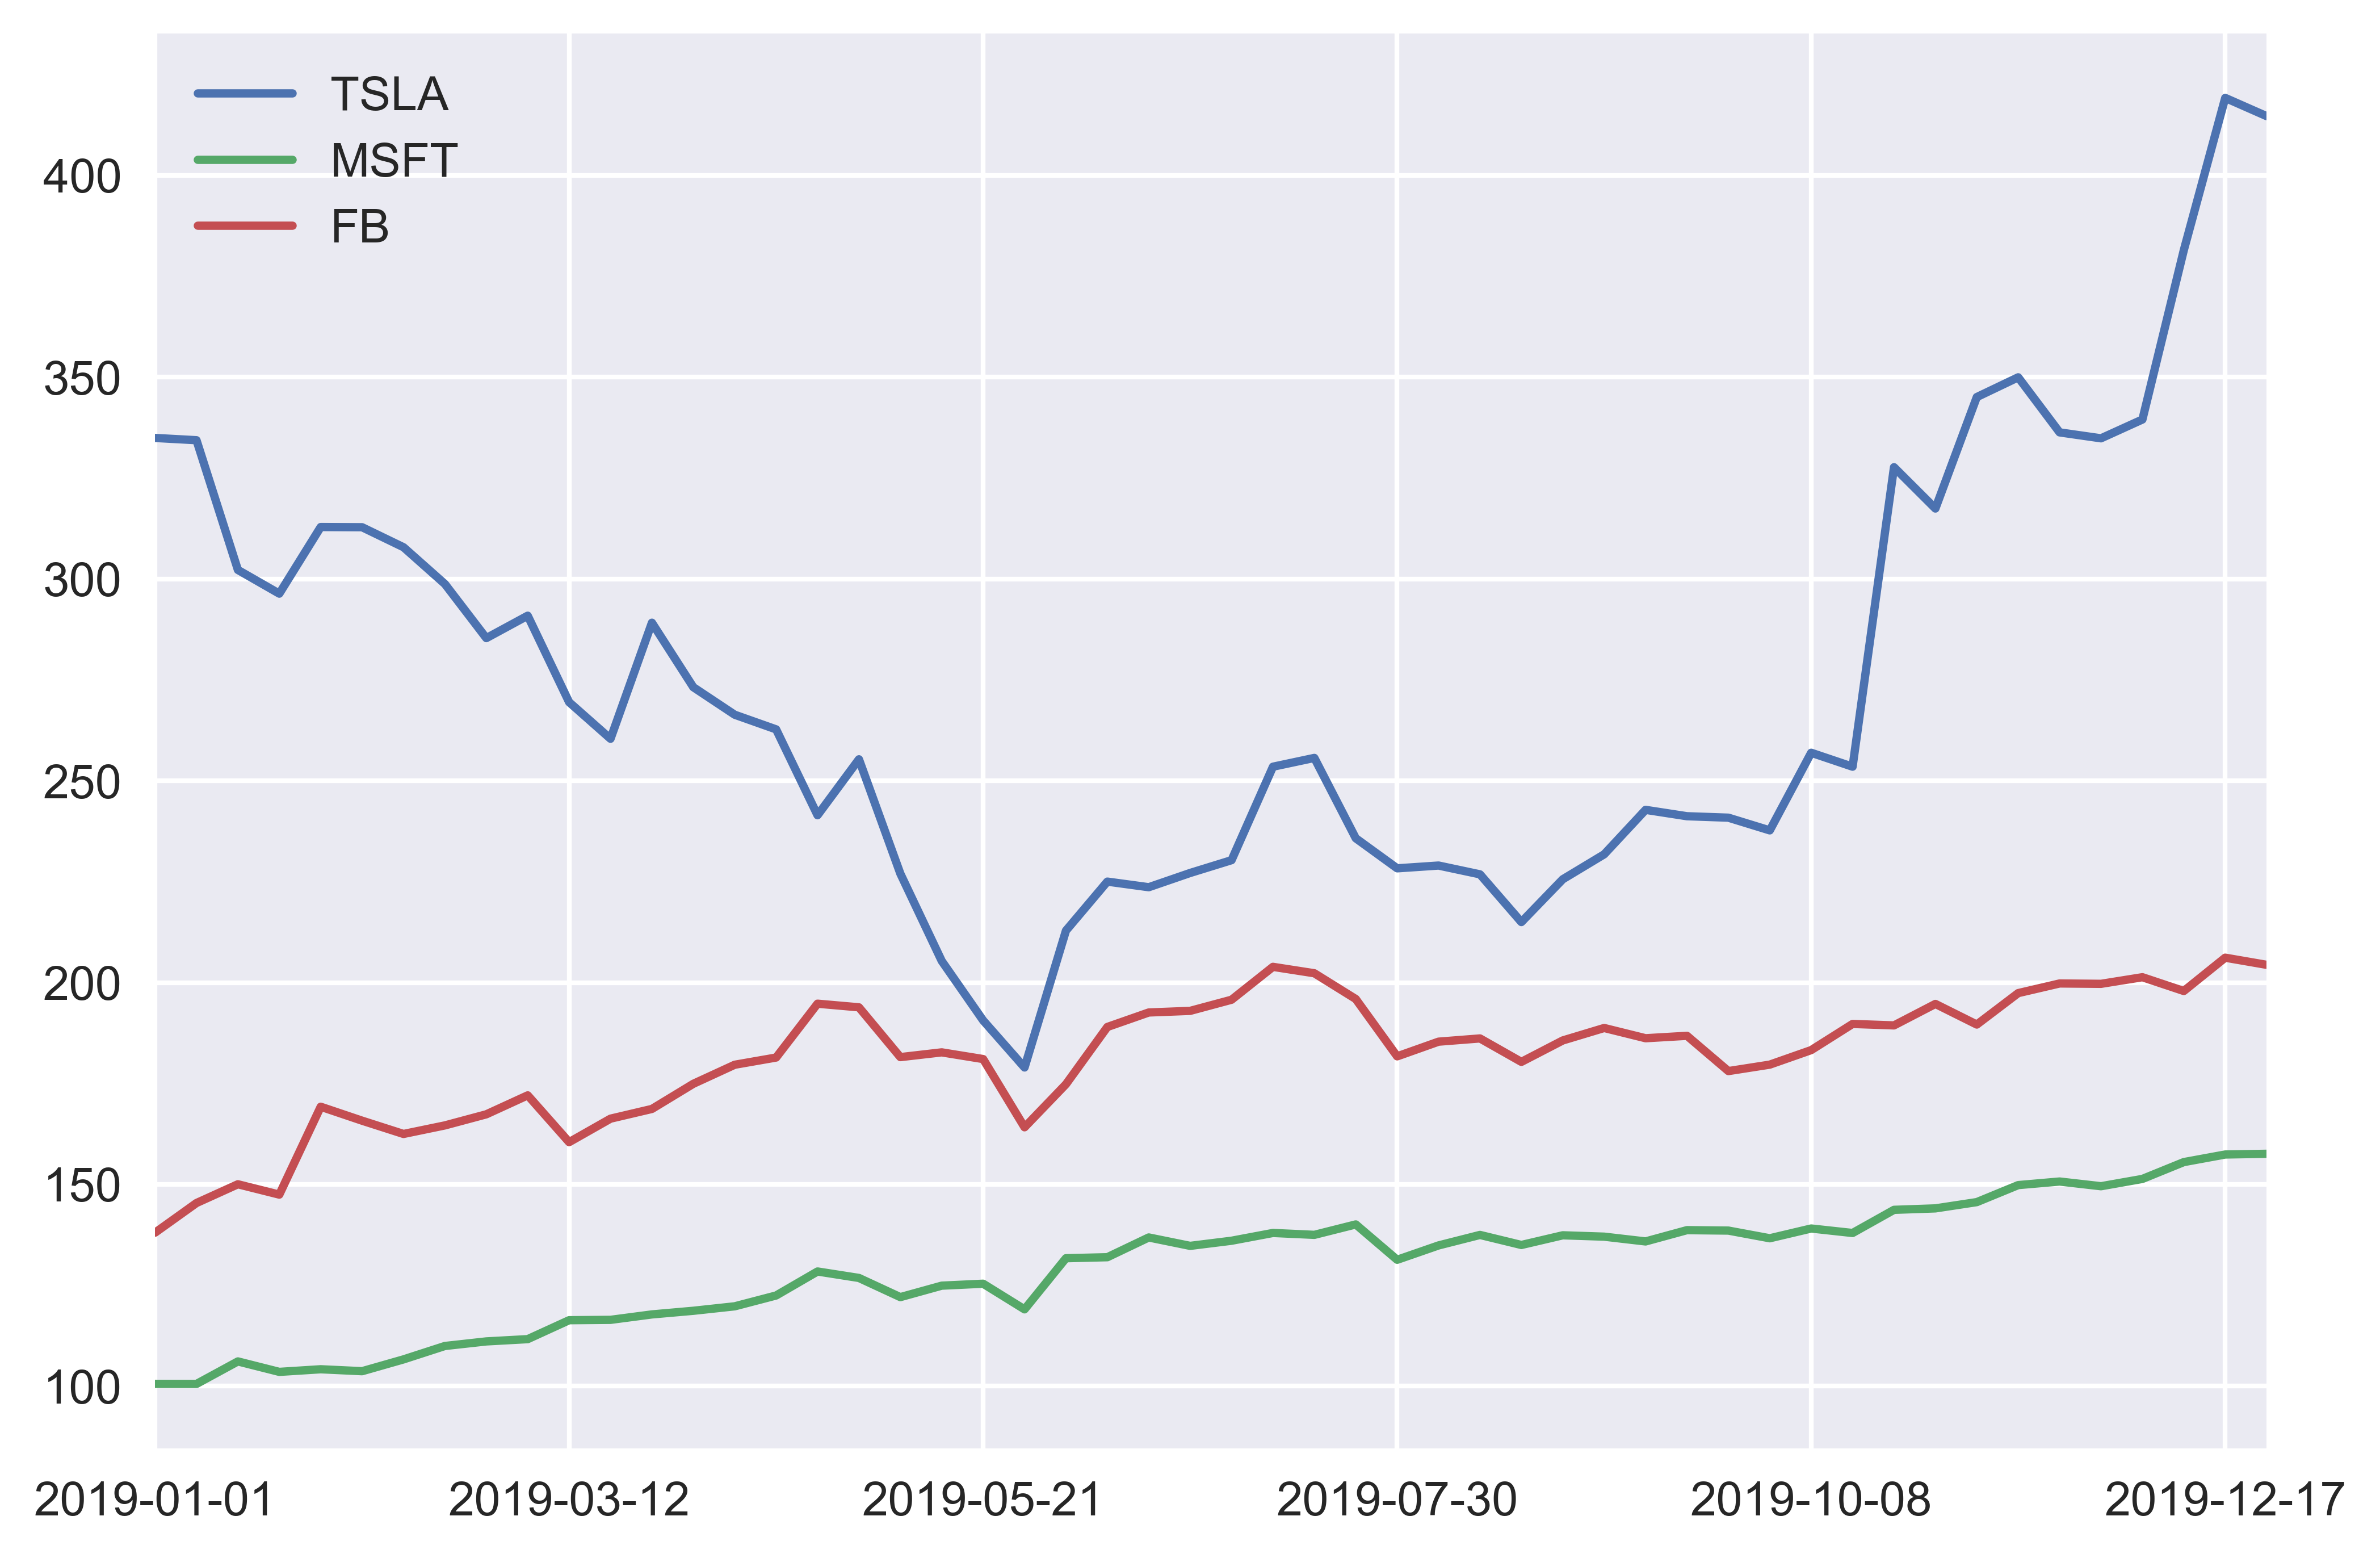

In [58]:
assets = ['TSLA', 'MSFT', 'FB']

yahoo_financials = YahooFinancials(assets)

data = yahoo_financials.get_historical_price_data(start_date='2019-01-01', 
                                                  end_date='2019-12-31', 
                                                  time_interval='weekly')

prices_df = pd.DataFrame({
    a: {x['formatted_date']: x['adjclose'] for x in data[a]['prices']} for a in assets
})

prices_df.plot()